In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv('reddit_posts copy.csv')

In [4]:
df.head()

,id,title,score,num_comments,author,created_utc,url,over_18,edited,spoiler,stickied
0,oWkBBaYn,Think however same.,57,38,toddhendrix,2024-07-13 11:35:02,http://www.smith.com/,True,True,True,False
1,RLqFqged,Four next daughter land business foot.,7,47,washingtoncurtis,2024-09-10 20:03:10,https://www.martin-rocha.com/,True,True,False,False
2,XqzFRYwt,Garden body early contain prepare feel once.,34,50,matthewmiller,2024-04-05 07:32:57,http://pugh.com/,False,True,True,False
3,FdsbLjzE,Pick only interview food among.,24,19,brendawright,2024-06-02 23:55:15,http://www.mclaughlin-maddox.com/,True,False,True,False
4,mRTwSTKi,Room fight professional thus.,44,15,kmiller,2024-09-30 03:28:18,https://www.bush.com/,False,True,False,False



# Loading a ZIP File in Python

To load and work with ZIP files in Python, you can use the built-in `zipfile` module. This module provides tools for creating, reading, writing, and extracting ZIP files.

Here's how you can load and work with a ZIP file:


In [75]:
import zipfile
import os

# Path to your ZIP file
zip_path = "Reddit_Data.csv.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Print the list of files in the ZIP
    print("Files in the ZIP archive:")
    for file in zip_ref.namelist():
        print(f"- {file}")
    
    # Extract all contents to a directory
    extract_dir = "extracted_files"
    print(f"\nExtracting all files to '{extract_dir}'...")
    zip_ref.extractall(extract_dir)
    
    # Extract a specific file (uncomment and modify if needed)
    # specific_file = "example.txt"
    # zip_ref.extract(specific_file, extract_dir)
    
    print(f"Files extracted successfully to '{extract_dir}'")
    
    # List the extracted files
    print("\nExtracted files:")
    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            print(f"- {os.path.join(root, file)}")

Files in the ZIP archive:
- Reddit_Data.csv

Extracting all files to 'extracted_files'...
Files extracted successfully to 'extracted_files'

Extracted files:
- extracted_files/Reddit_Data.csv



You can modify this code to:
- Extract specific files instead of all files
- Read file contents directly without extracting
- Check if specific files exist in the archive

Other useful Python packages for working with archives:
- `py7zr` - For working with 7z archives
- `rarfile` - For working with RAR archives
- `tarfile` - For working with TAR archives (included in standard library)
- `gzip`, `bz2`, `lzma` - For working with various compression formats (included in standard library)

Remember to replace `"your_file.zip"` with the actual path to your ZIP file.

In [5]:
df = pd.read_csv('Reddit_Data.csv')

In [6]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [7]:
df.info()
df.isnull().sum()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


Index(['clean_comment', 'category'], dtype='object')

In [8]:
df['category'].value_counts()  # replace 'label' with the actual column name


category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

In [9]:
df.sample()['clean_comment'].values

array([' with data from the employees provident fund organisation showing rise formal sector jobs informal sector jobs too would have risen would jobs created mudra loans our traditional matrix measuring jobs simply not good enough measure new jobs the new economy new india ” the noted kaka admits cherry picking data and makes khayali pulao '],
      dtype=object)

In [10]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [11]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [12]:
#drop missing values
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

350

In [14]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [15]:
#remove duplicate data
df.drop_duplicates(inplace=True)

In [16]:
#checking new line in  dataset
df[(df['clean_comment'].str.strip() == '')]


,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [17]:
df=df[~(df['clean_comment'].str.strip() == '')]

In [18]:
#converting to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()


In [19]:
df['clean_comment'].head()

0     family mormon have never tried explain them t...
1    buddhism has very much lot compatible with chr...
2    seriously don say thing first all they won get...
3    what you have learned yours and only yours wha...
4    for your own benefit you may want read living ...
Name: clean_comment, dtype: object

In [20]:

df[df['clean_comment'].apply(lambda x: x.endswith('') or startswith(''))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [21]:
df['clean_comment'] = df['clean_comment'].str.strip()  # removes leading/trailing
df['clean_comment'] = df['clean_comment'].str.replace(r"\s+", " ", regex=True)  # replaces multiple spaces with one


In [22]:
df['clean_comment'].apply(lambda x: x.endswith('') or startswith('')).sum()

36793

In [23]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)   # Remove URLs
    text = re.sub(r"\s+", " ", text)                      # Remove extra whitespace
    text = re.sub(r"\\+|\/+", " ", text)                  # Replace slashes with space
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)            # Remove special chars except space
    return text.strip()


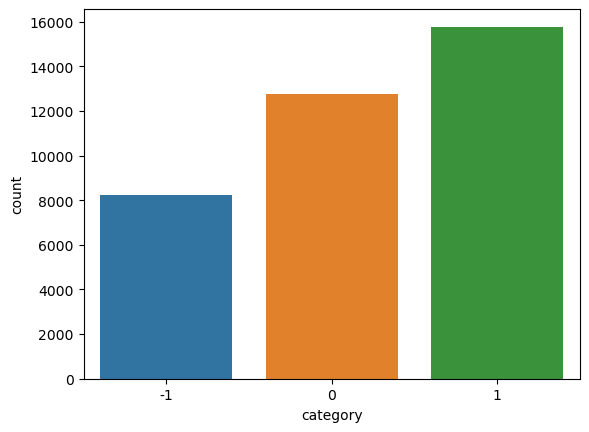

In [24]:
sns.countplot(data=df,x='category');

In [25]:
df['word_count']= df['clean_comment'].apply(lambda x: len(x.split()))

In [26]:
df.sample(5)

,clean_comment,category,word_count
12159,jaspal should punished severely,0,4
32477,kek the article goes from estimated that betwe...,1,50
4196,but zomato happened,0,3
12722,need radical changes india education and resea...,1,20
11126,actor was good good good good good good good g...,1,33


In [27]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [28]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

/tmp/ipykernel_176/4255542775.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['word_count'],kde=True);
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


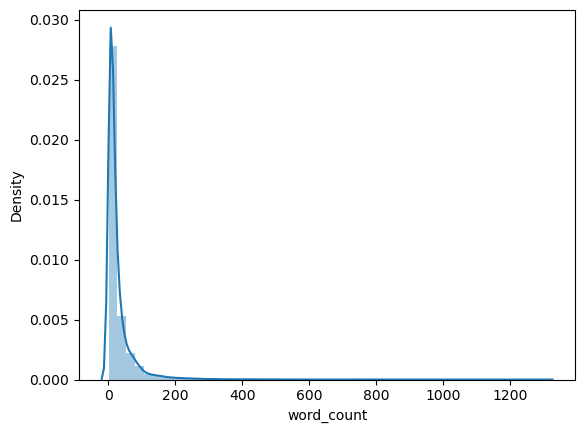

In [29]:
sns.distplot(df['word_count'],kde=True);

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


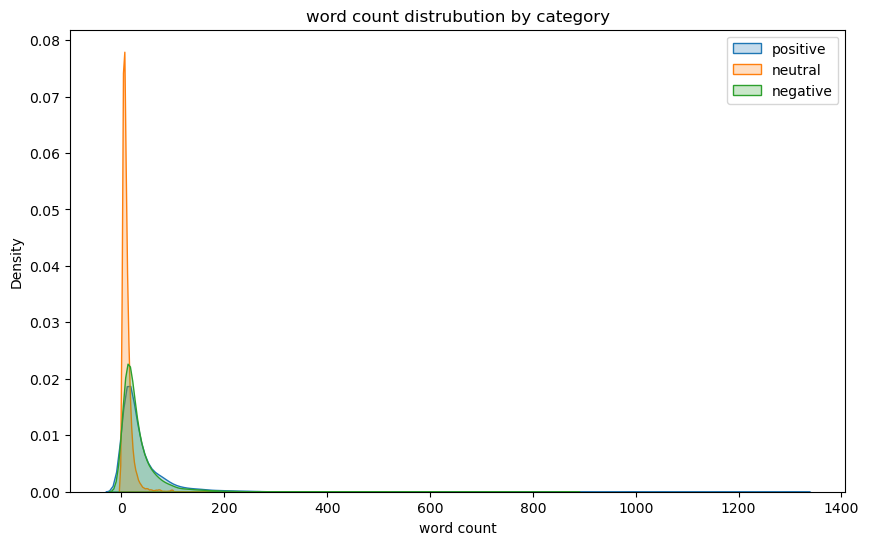

In [30]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category'] == 1]['word_count'], label='positive',fill=True)
sns.kdeplot(df[df['category'] == 0]['word_count'], label='neutral',fill=True)
sns.kdeplot(df[df['category'] == -1]['word_count'], label='negative',fill=True)
plt.title('word count distrubution by category')
plt.xlabel('word count')
plt.ylabel('Density')
plt.legend()
plt.show();

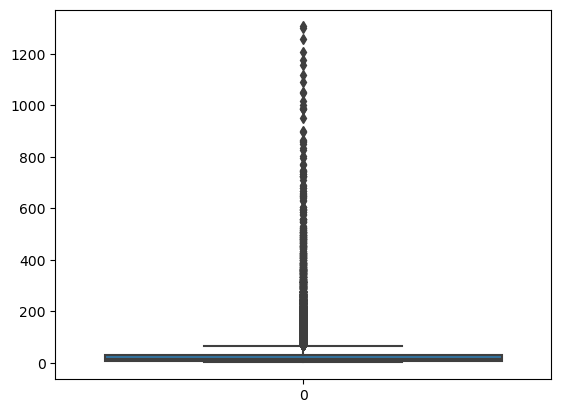

In [31]:
sns.boxplot(df['word_count']);

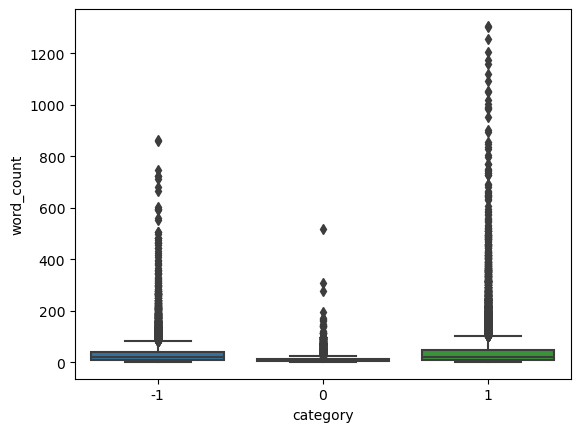

In [32]:
sns.boxplot(data=df,x='category',y='word_count');

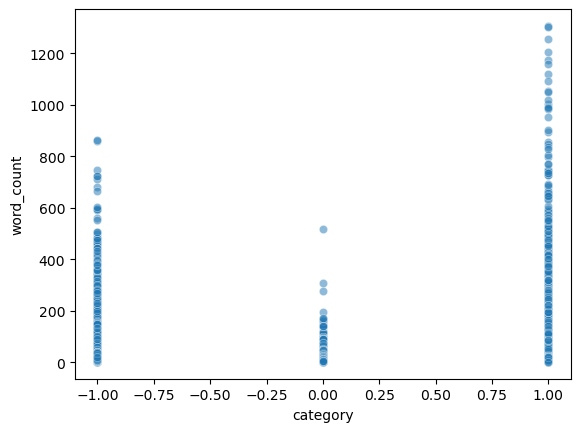

In [33]:
sns.scatterplot(data=df,x='category',y='word_count',alpha=0.5);

<Axes: xlabel='category', ylabel='word_count'>

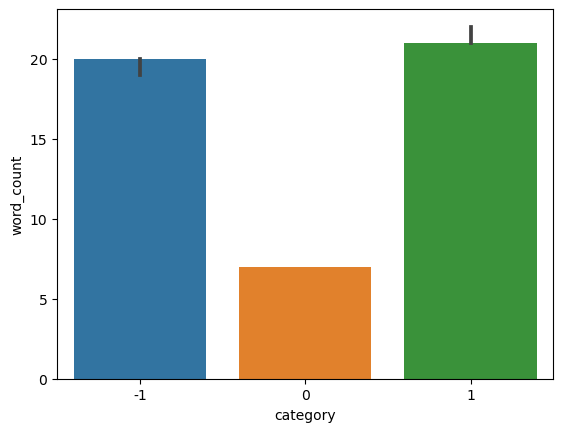

In [34]:
import numpy as np  # Import numpy to access the median function
import seaborn as sns  # Make sure seaborn is imported

# Now use np.median instead of just median
sns.barplot(df, x='category', y='word_count', estimator=np.median)

In [35]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [36]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/9316b2fe-a8d9-44bb-9a86-
[nltk_data]     a1e0d1f932de/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
12833,when individual donations were restricted the ...,-1,17,8
6710,disliked the voice acting arr much changed any...,1,53,19
21661,wish people just tie the hands and legs theses...,1,43,17
18139,motu karlo,0,2,0
15162,one those that would have argued against you b...,1,221,88


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


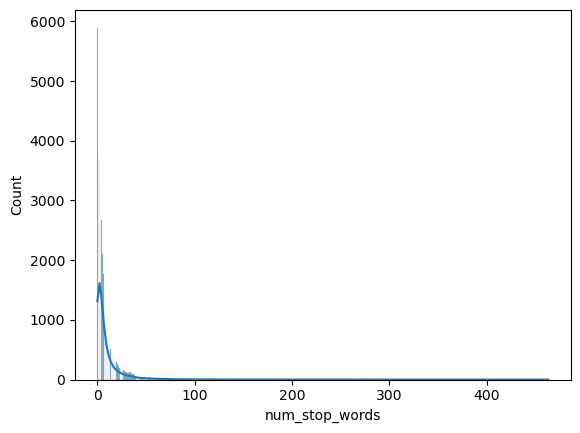

In [38]:
sns.histplot(df['num_stop_words'],kde=True);

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


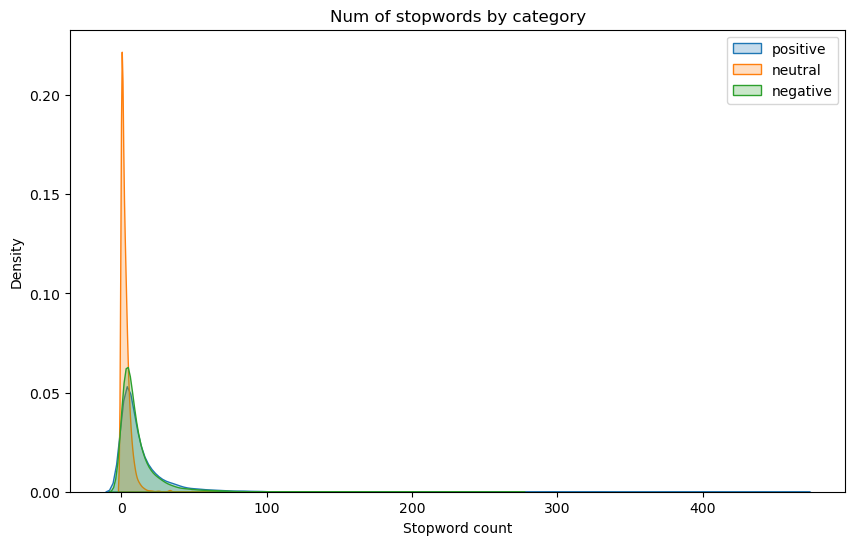

In [39]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='negative', fill=True)
plt.title('Num of stopwords by category')
plt.xlabel('Stopword count')
plt.ylabel('Density')
plt.legend()
plt.show()


<Axes: xlabel='count', ylabel='stop_word'>

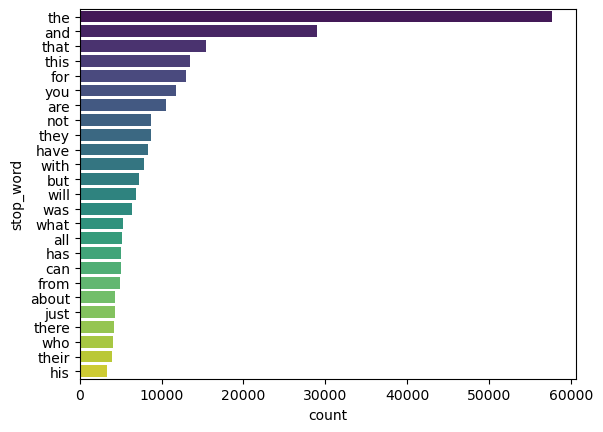

In [40]:
from collections  import Counter
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
most_common_stop_words = Counter(all_stop_words).most_common(25)
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])
sns.barplot(data=top_25_df,x='count',y='stop_word',palette='viridis')

In [41]:
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [42]:
from collections import Counter

all_text = ' '.join(df['clean_comment'])
char_frequency = Counter(all_text)
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=True)


In [43]:
char_frequency_df['character'].values

array(['⛵', 'थ', '✓', ..., 't', 'e', ' '], dtype=object)

In [44]:
df['num_panchuation_chars'] = df['clean_comment'].apply(
     lambda x: sum([1 for char in x if char in '.,!?;()[]-/'])
)

In [45]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_panchuation_chars
30375,may this why modi helped ambani,0,6,2,31,0
10696,hell the yes despite the fact that megalomania...,-1,63,20,430,0
17170,top anime betrayals,1,3,0,19,0
5029,chutiya sarkar chuytia supporter was never tol...,-1,43,16,267,0
27357,behalf all the people india and our government...,1,27,11,178,0


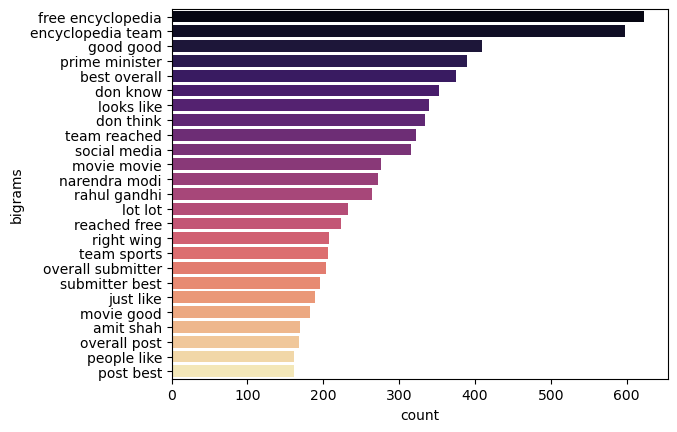

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigrams', 'count'])

sns.barplot(data=top_25_bigrams_df, x='count', y='bigrams', palette='magma')
plt.show()


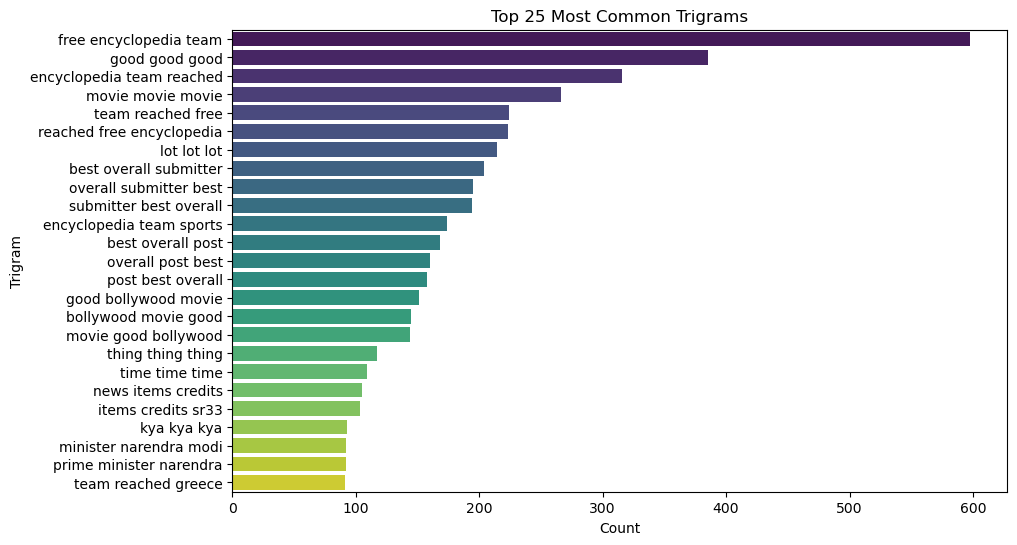

In [48]:
# Function to get top N trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert to DataFrame
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='viridis')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()



In [49]:
#remove non english words from clean_comment
import re
import re

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x))
)


In [51]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1091554
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [52]:

from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




In [53]:

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/9316b2fe-a8d9-44bb-9a86-
[nltk_data]     a1e0d1f932de/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_panchuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.2 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


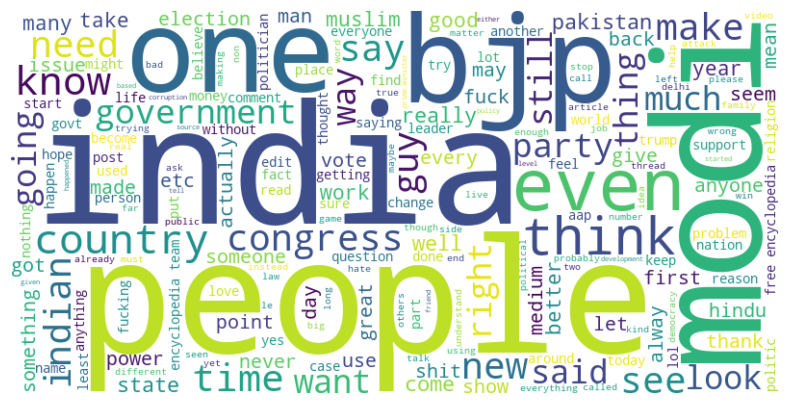

In [55]:
# Install the required package
!pip install wordcloud

# Then run your original code
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

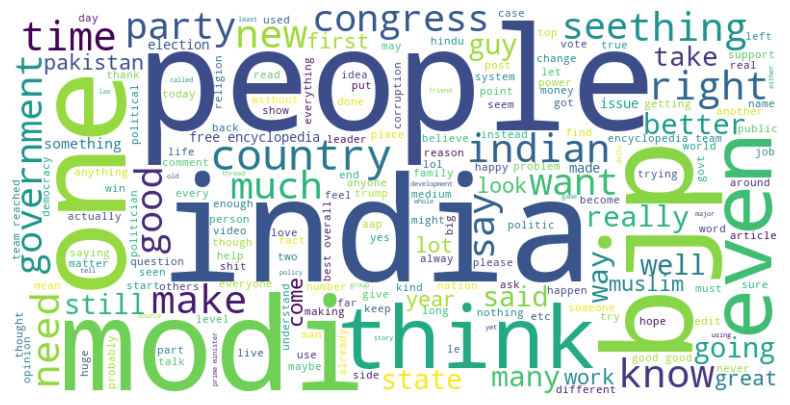

In [56]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

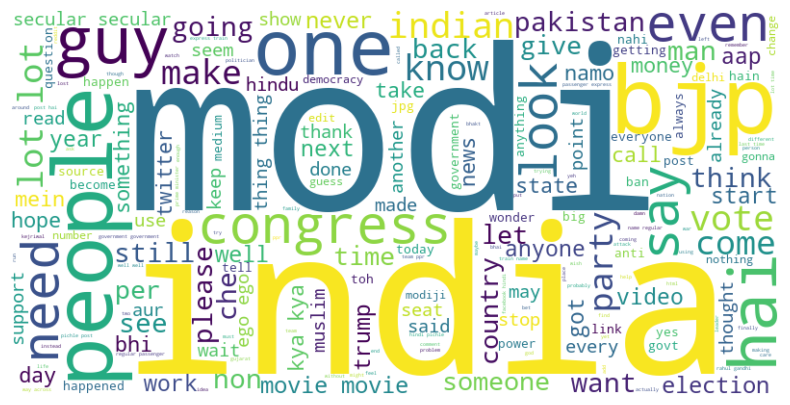

In [57]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

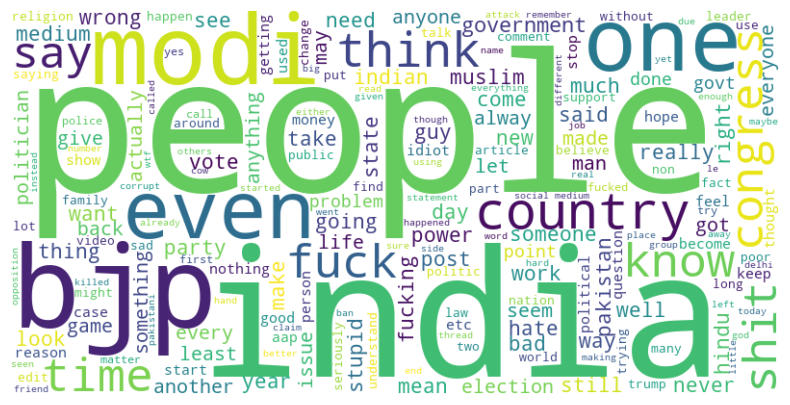

In [58]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


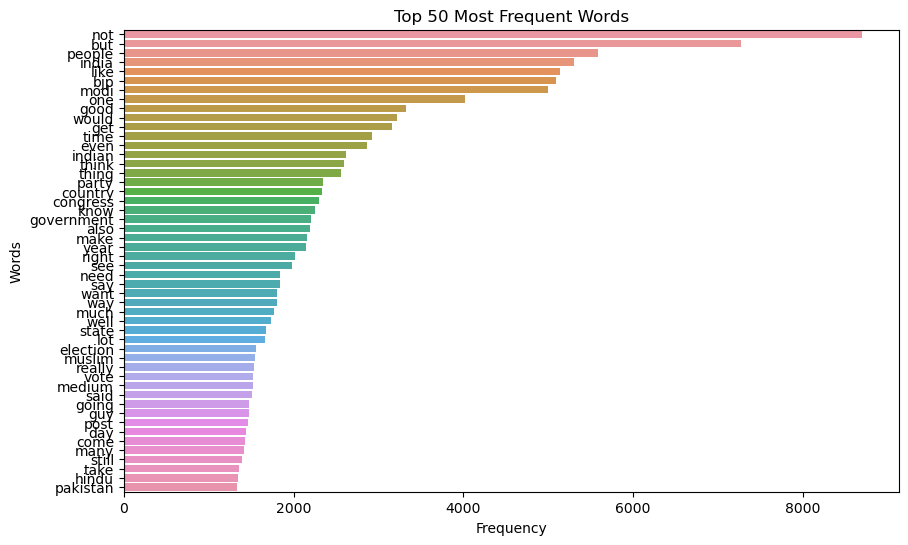

In [59]:

def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


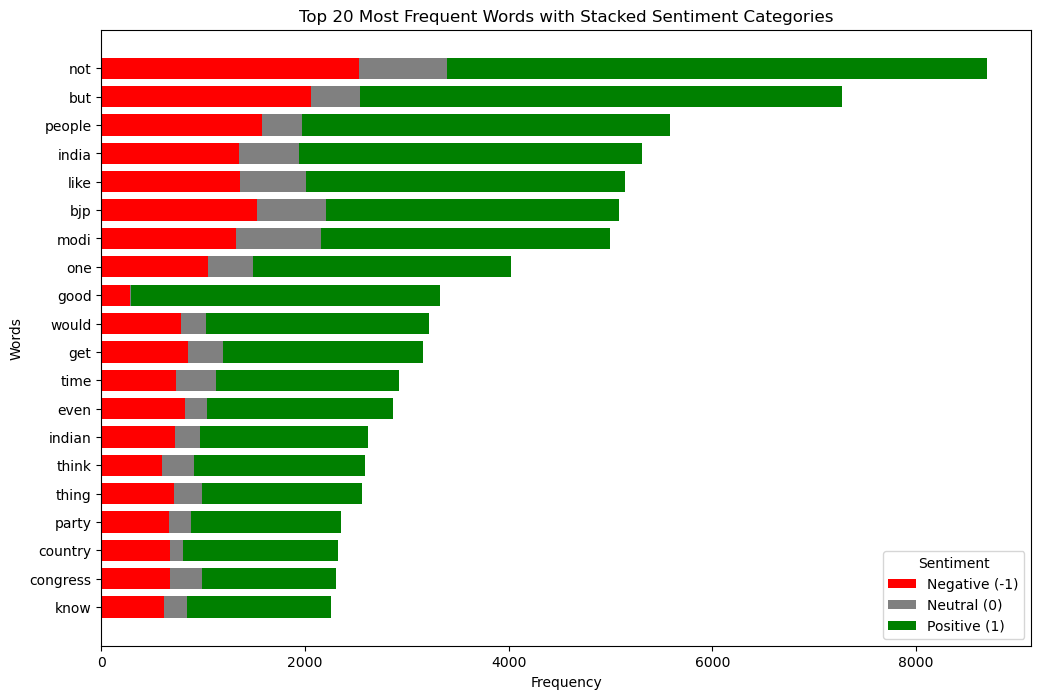

In [60]:

def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)

     